In [1]:
import itertools
import matplotlib.pyplot as plt

In [2]:
def sub_pixel_creator(center, side_length, n_p):
    
    step_size = side_length / n_p
    leftmost_x = center[0] - side_length / 2
    lowest_y = center[1] - side_length / 2

    center_xs, center_ys = [], []
    center_x, center_y = leftmost_x + step_size / 2, lowest_y + step_size / 2
    
    for i in range(n_p):
        center_xs.append(center_x)
        center_ys.append(center_y)
        center_x += step_size
        center_y += step_size
    
    centers = list(itertools.product(center_xs, center_ys))
    new_side_length = step_size 
    
    return centers, new_side_length

In [3]:
def iterative_sub_pixel_creator(initial_center, side_length, n_p, desired_runs):
    
    i = 0
    centers = [initial_center]
    
    while i < desired_runs:
        
        running_list_of_centers = []
        for center in centers:
            output_centers, new_side_length = sub_pixel_creator(center, side_length, n_p)
            for value in output_centers:
                running_list_of_centers.append(value)
        
        centers = running_list_of_centers
        side_length = new_side_length
        i += 1
    
    return centers

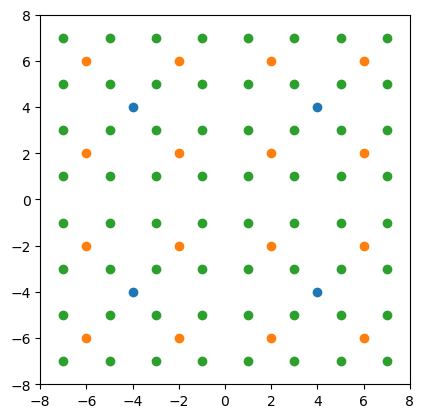

In [6]:
initial_center = (0,0)
side_length = 16
n_p = 2
for run in range(1, 4):
    plt.scatter(*zip(*iterative_sub_pixel_creator(initial_center, side_length, n_p, run)))
    plt.axis('square')
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)